# Data Exploration - Time Series Data

In [26]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8.0,6.0)})

In [27]:
test = pd.read_csv('../data/training/test.csv',index_col=1, parse_dates=True)

In [28]:
test.head()

,Unnamed: 0,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_date_id
date_val,,,,,,,,,,,,,,,,,,,
2018-01-10,395940,2018,1,10,4,1,1,0,395941,999001,A,0,1,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-07,893697,2019,2,7,5,1,1,0,893698,999001,A,0,1,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-16,1158683,2019,8,16,6,1,1,0,1158684,417740,B,70,0,481888.0,0.0,1.0,1.0,0.0,958.0
2018-12-11,815508,2018,12,11,3,1,1,0,815509,999001,A,0,1,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-14,519998,2018,4,14,7,0,0,0,519999,417380,B,0,1,NaN,NaN,NaN,NaN,NaN,NaN


## ePA Volume by Day

Looks like we see both a trend and seasonality.

In [29]:
pa_data = test.dropna()

In [30]:
pa_data_daily_count = pa_data.resample('D').count()
pa_data_daily_sum = pa_data.resample('D').sum()

In [31]:
pa_data_daily_count_weekday = pa_data_daily_count[pa_data_daily_sum['is_workday'].values!=0]
pa_data_daily_count_weekend = pa_data_daily_count[pa_data_daily_sum['is_workday'].values==0]

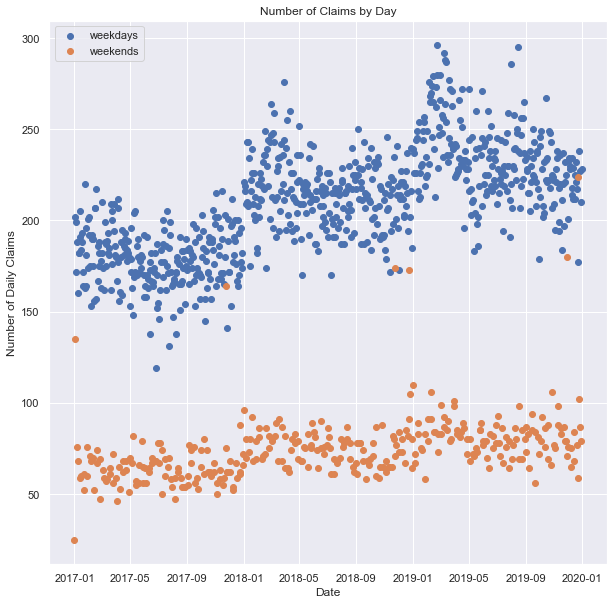

In [32]:
# the outliers might be the first of year 


# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(pa_data_daily_count_weekday.index.values,
           pa_data_daily_count_weekday['calendar_month'],label='weekdays')

ax.scatter(pa_data_daily_count_weekend.index.values,
           pa_data_daily_count_weekend['calendar_month'],label='weekends')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of Daily Claims",
       title="Number of Claims by Day")

ax.legend()

plt.show()

## ePA Volume by Month

In [64]:
pa_data_monthly_count = pa_data.resample('M').count()
pa_data_monthly_sum = pa_data.resample('M').sum()

In [65]:
pa_data_monthly_count = pa_data_monthly_count[pa_data_monthly_sum['is_workday'].values!=0]

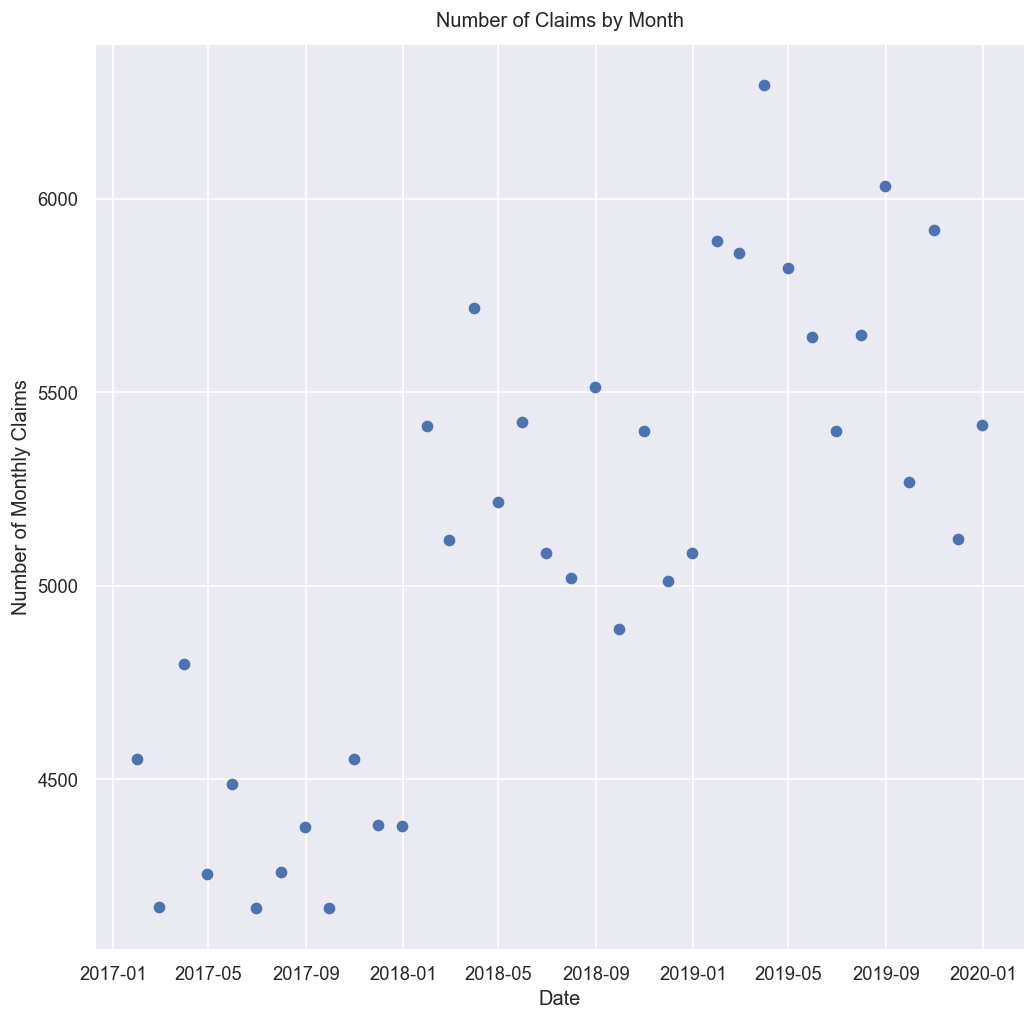

In [67]:
# the outliers might be the first of year 


# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(pa_data_monthly_count.index.values,
           pa_data_monthly_count['calendar_month'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of Monthly Claims",
       title="Number of Claims by Month")

plt.show()

## Autocorrelations

Interesting, we see that the daily volume is more correlated for the weekday day's than the weekend.

Text(0.5, 1.0, 'Autocorrelation of Weekday Daily ePA Volume')

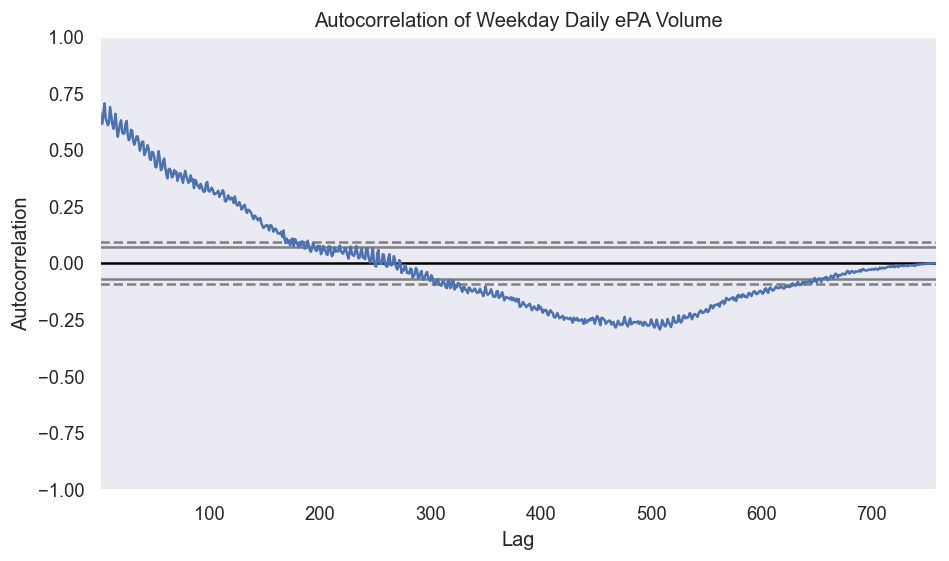

In [52]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pa_data_daily_count_weekday['calendar_month'].values.tolist())
plt.title('Autocorrelation of Weekday Daily ePA Volume')

Text(0.5, 1.0, 'Autocorrelation of Weekend Daily ePA Volume')

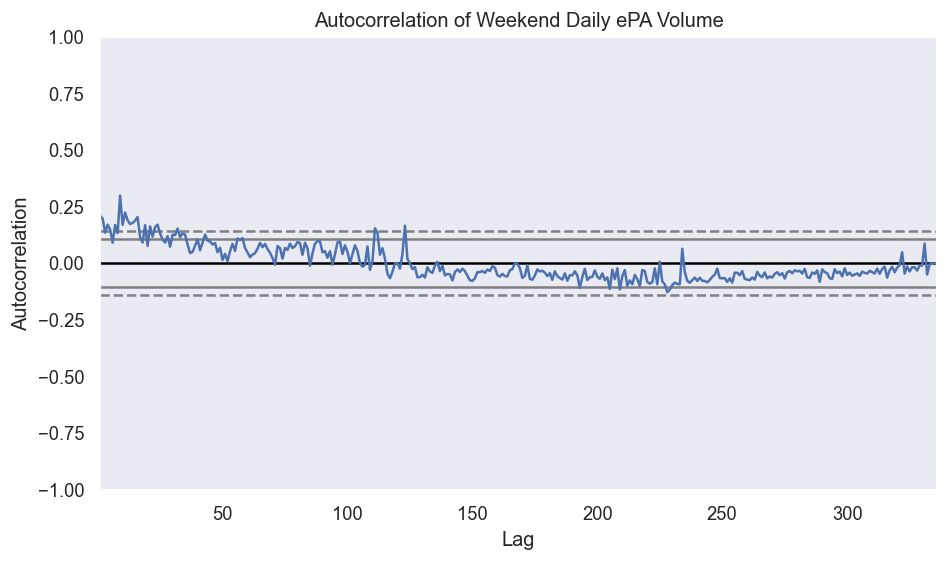

In [53]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pa_data_daily_count_weekend['calendar_month'].values.tolist())
plt.title('Autocorrelation of Weekend Daily ePA Volume')

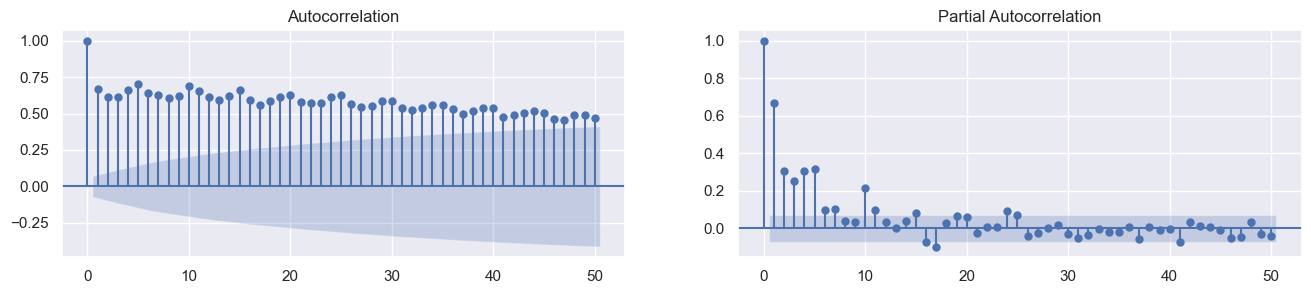

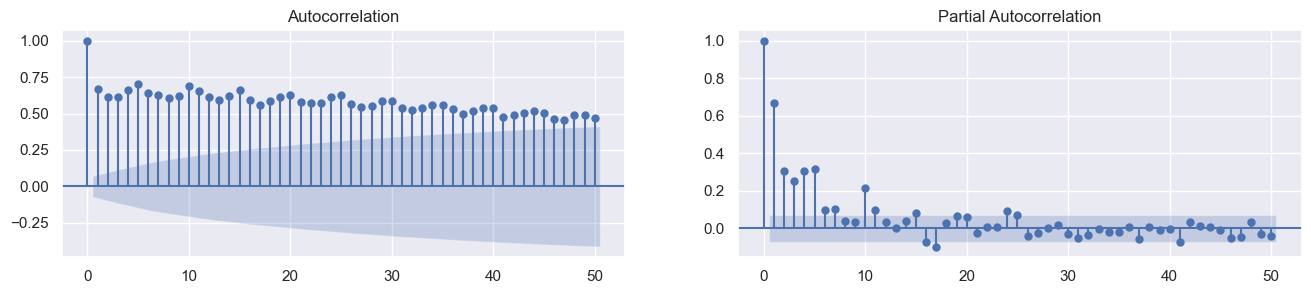

In [56]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(pa_data_daily_count_weekday['calendar_year'].values.tolist(), lags=50, ax=axes[0])
plot_pacf(pa_data_daily_count_weekday['calendar_year'].values.tolist(), lags=50, ax=axes[1])

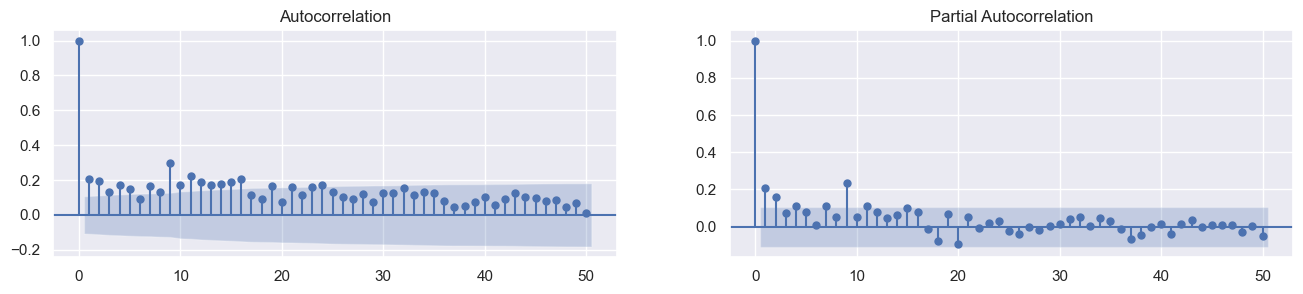

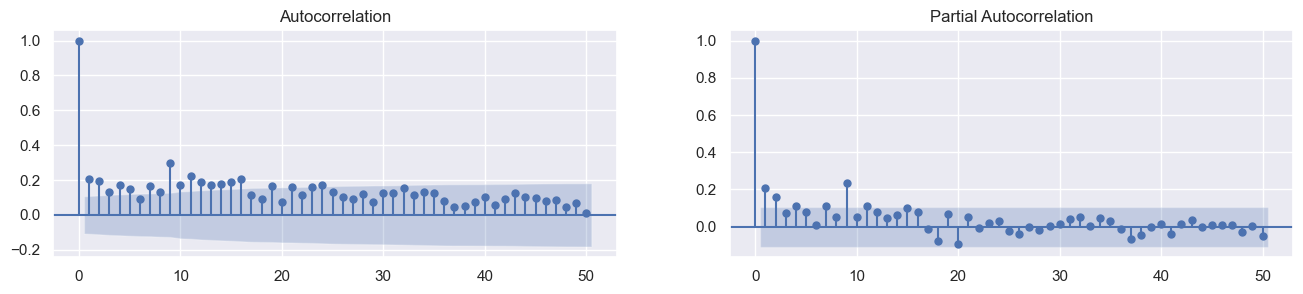

In [55]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(pa_data_daily_count_weekend['calendar_year'].values.tolist(), lags=50, ax=axes[0])
plot_pacf(pa_data_daily_count_weekend['calendar_year'].values.tolist(), lags=50, ax=axes[1])

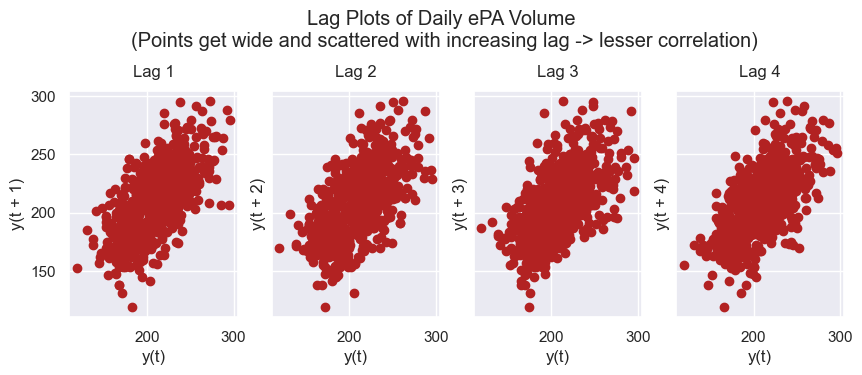

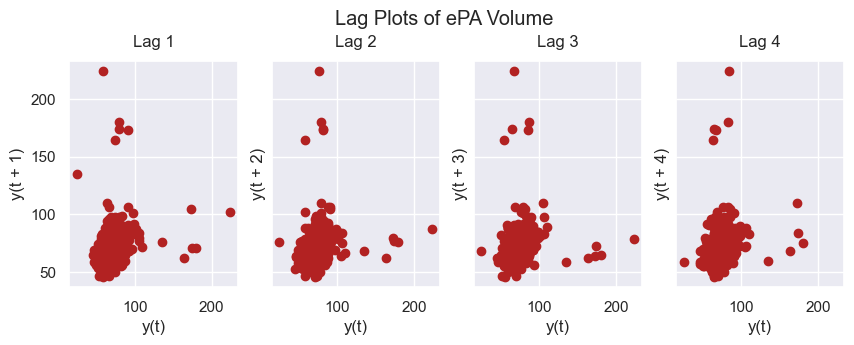

In [60]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(pa_data_daily_count_weekday['calendar_year'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Daily ePA Volume \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(pa_data_daily_count_weekend['calendar_year'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of ePA Volume', y=1.05)    
plt.show()

## Seasonality Detrending

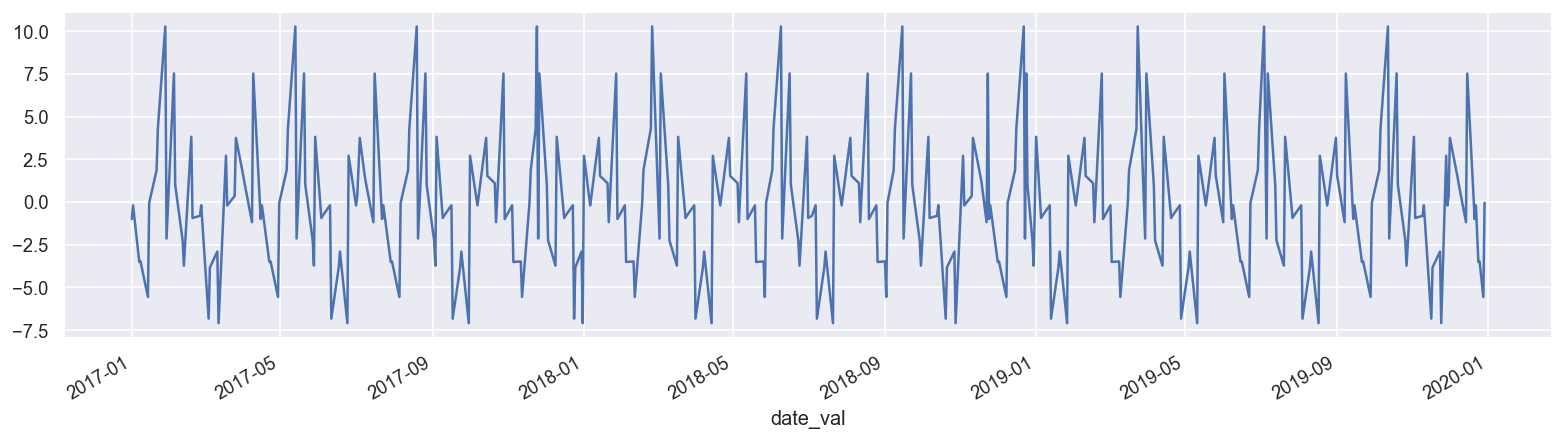

In [75]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(pa_data_daily_count_weekend['calendar_year'],period=30)

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

Slope as a function of date.

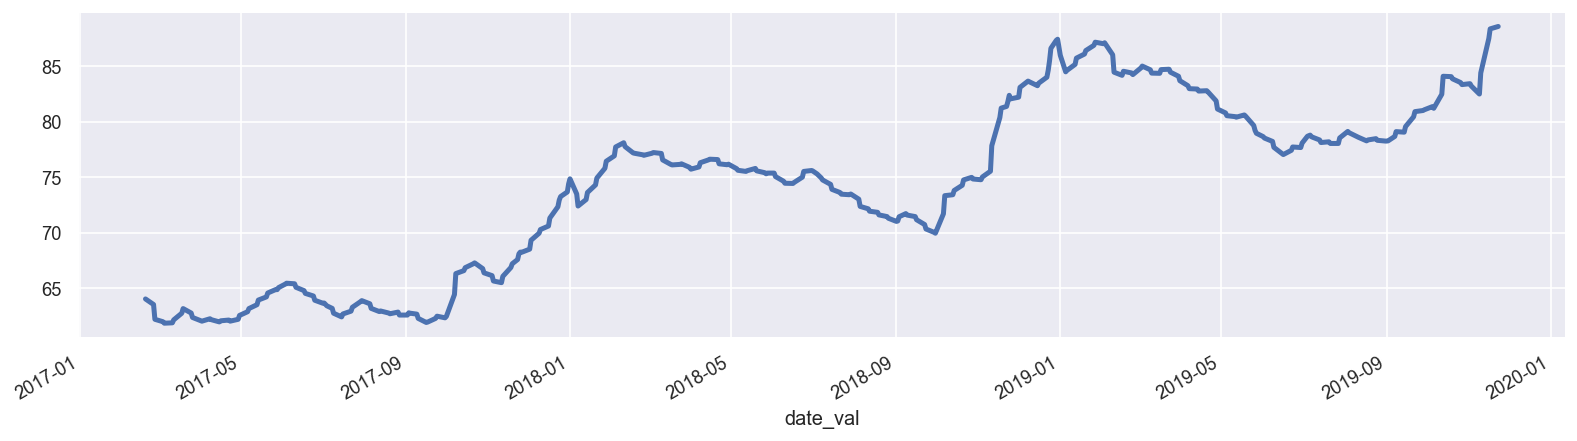

In [78]:
decomposition = sm.tsa.seasonal_decompose(pa_data_daily_count_weekend['calendar_year'],period=30)

decomposition.trend.plot( layout=(4, 3), linewidth=3);

## Noise

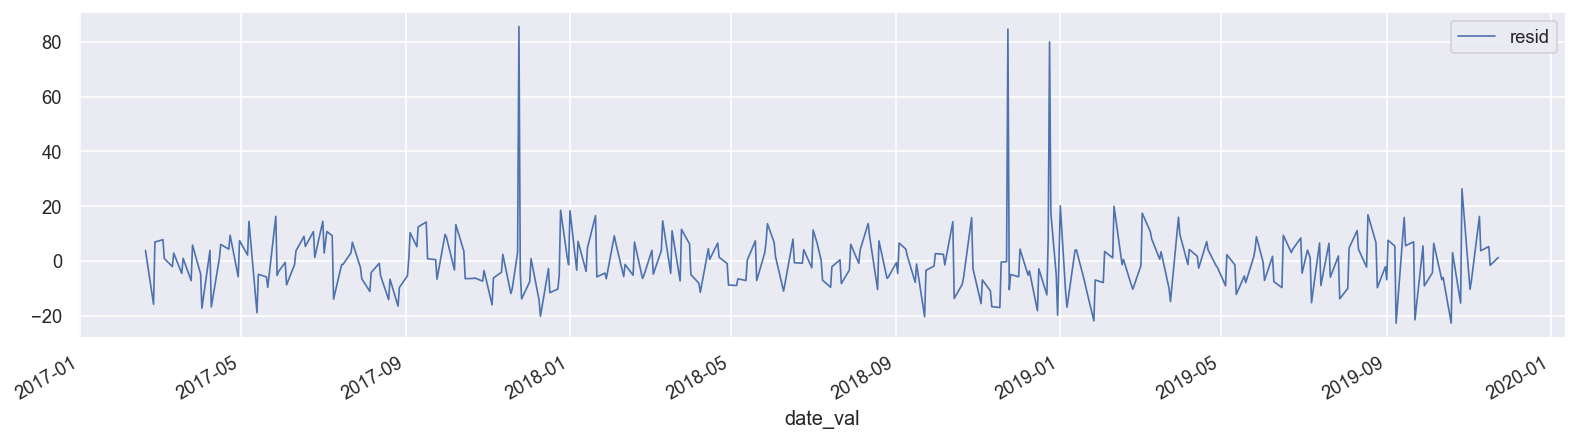

In [79]:
pd.DataFrame(decomposition.resid).plot(layout=(3, 3), linewidth=1);